In [1]:
import mxnet as mx
from mxnet import recordio

In [2]:
import os
import cv2
import numbers
import threading
import numpy as np
import queue as Queue
import matplotlib.pyplot as plt

import torch
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms

In [3]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# MS1M-Retina face dataset

## Reading the rec files

In [4]:
# path_imgidx2 = 'D:/Face/ms1m-retinaface-t1/train.idx'
# path_imgrec2 = 'D:/Face/ms1m-retinaface-t1/train.rec'
# imgrec2 = recordio.MXIndexedRecordIO(path_imgidx2, path_imgrec2, 'r')

# len(imgrec2.keys)

## Viewing the outputs

In [5]:
# img_list2 = []

# #%% 1 ~ 5272942
# for i in range(5000000):
#     header, s = recordio.unpack(imgrec2.read_idx(i+1))
# #     img = mx.image.imdecode(s).asnumpy() 
# #     plt.imshow(img)
# #     plt.title('id=' + str(i) + ', label=' + str(header.label))
# #     print(header.label)
# #     plt.pause(0.1)
#     img_list2.append(header.label)

In [6]:
# len(img_list2)

In [7]:
# img_list2

In [8]:
# img_list2 = np.array(img_list2)
# print(len(np.unique(img_list2)))

In [9]:
# img_list2[99500:99520]

### Not working

### ----------------------------------

In [10]:
# res_list2 = []
# _img_list2 = img_list2[0:5]

# for item in _img_list2: 
#     if item not in res_list2: 
#         res_list2.append(item) 

# print("Unique elements of the list using append():\n")
# print(len(res_list2))

# #for item in res_list: 
# #    print(item) 

### ----------------------------------

In [11]:
# record = mx.recordio.MXIndexedRecordIO('D:/Face/faces_emore/train.idx', 'D:/Face/faces_emore/train.rec', 'r')

In [12]:
#record.read_idx(3)
#record

In [13]:
# while True:
#     item = record.read()
#     if not item:
#         break
#     print(item)
#     break
# record.close()

In [14]:
# len(record.keys)

In [15]:
# record.keys[5908394]

In [16]:
# record.keys[5908395]

In [17]:
# data = np.ones((3,3,1), dtype=np.uint8)
# label = 1.0
# header = mx.recordio.IRHeader(flag=0, label=label, id=0, id2=0)
# s = mx.recordio.pack_img(header, data, quality=100, img_fmt='.jpg')

In [18]:
# unpack_img
# print(mx.recordio.unpack_img(s))

In [19]:
# #list_inp = [100, 75, 100, 20, 75, 12, 75, 25]
# list_inp = [[100, 75], [100, 20], [75, 12], [75, 25], [1, 2]]

# set_res = set(list_inp) 
# print("The unique elements of the input list using set():\n") 
# list_res = (list(set_res))
 
# for item in list_res: 
#     print(item) 

# MS1M-ArcFace dataset

In [20]:
#For Windows system

# path_imgidx = 'D:/Face/faces_emore/train.idx'
# path_imgrec = 'D:/Face/faces_emore/train.rec'
# imgrec = recordio.MXIndexedRecordIO(path_imgidx, path_imgrec, 'r')

# len(imgrec.keys)

In [22]:
#For Ubuntu system

path_imgidx = 'faces_emore/train.idx'
path_imgrec = 'faces_emore/train.rec'
imgrec = recordio.MXIndexedRecordIO(path_imgidx, path_imgrec, 'r')

len(imgrec.keys)

5908396

In [23]:
imgrec.keys

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [24]:
list(imgrec.keys)

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [25]:
np.array(list(imgrec.keys))

array([      1,       2,       3, ..., 5908394, 5908395,       0])

In [26]:
img_list = []

#%% 1 ~ 5908396, or 0~5908395, #85742 identities

for i in range(5908395):
    header, s = recordio.unpack(imgrec.read_idx(i+1))
#     img = mx.image.imdecode(s).asnumpy() 
#     plt.imshow(img)
#     print(img.shape)
#     plt.title('id=' + str(i) + ', label=' + str(header.label))
#     plt.pause(0.1)
    img_list.append(header.label)

In [27]:
len(img_list)

5908395

In [28]:
# img_list = np.array(img_list)
# print(np.unique(img_list))

In [29]:
_img_list = img_list[0:5822653]
__img_list = np.array(_img_list)
print(len(__img_list))
print(len(np.unique(__img_list)))

5822653
85742


In [30]:
# res_list = []

# for item in _img_list:
#     if item not in res_list:
#         res_list.append(item)

# print("Unique elements of the list using append():")
# print(len(res_list))

# #for item in res_list: 
# #    print(item)

In [31]:
5908395 - 5822653

85742

In [32]:
img_list[5822653]

array([  1., 111.], dtype=float32)

In [33]:
img_list[5822654]

array([111., 130.], dtype=float32)

Text(0.5, 1.0, 'id=1000, label=13.0')

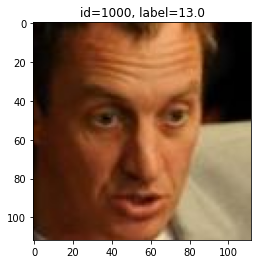

In [37]:
idx1 = 1000 #5908395
header1, s1 = recordio.unpack(imgrec.read_idx(idx1))

img1 = mx.image.imdecode(s1).asnumpy()
plt.imshow(img1)
plt.title('id=' + str(idx1) + ', label=' + str(header1.label))

Text(0.5, 1.0, 'id=5822656, label=[130. 213.]')

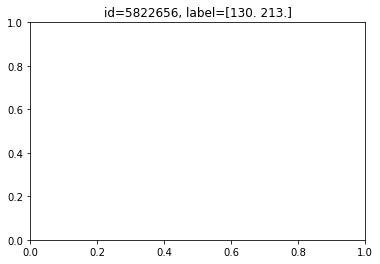

In [38]:
idx = 5822656
header, s = recordio.unpack(imgrec.read_idx(idx))

#img = mx.image.imdecode(s).asnumpy()
#plt.imshow(img)
plt.title('id=' + str(idx) + ', label=' + str(header.label))

In [39]:
header.flag

2

In [40]:
header.label

array([130., 213.], dtype=float32)

In [41]:
header0 = (int(header.label[0]), int(header.label[1]))
header0

(130, 213)

In [42]:
np.array(range(1, int(header.label[0])))

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129])

In [43]:
class ArcFaceDataset(Dataset):
    def __init__(self):
        super(ArcFaceDataset, self).__init__()
        self.transform = transforms.Compose(
            [transforms.ToPILImage(),
             transforms.RandomHorizontalFlip(),
             transforms.ToTensor(),
             transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
             ])
        
        #self.root_dir = root_dir
        root_dir2 = "faces_emore/"
        #self.local_rank = local_rank
        
        path_imgrec = os.path.join(root_dir2, 'train.rec')
        path_imgidx = os.path.join(root_dir2, 'train.idx')
        self.imgrec = mx.recordio.MXIndexedRecordIO(path_imgidx, path_imgrec, 'r')
        s = self.imgrec.read_idx(0)
        header, _ = mx.recordio.unpack(s)
        
        if header.flag > 0:
            self.header0 = (int(header.label[0]), int(header.label[1]))
            self.imgidx = np.array(range(1, int(header.label[0])))
        else:
            self.imgidx = np.array(list(self.imgrec.keys))

    def __getitem__(self, index):
        idx = self.imgidx[index]
        s = self.imgrec.read_idx(idx)
        header, img = mx.recordio.unpack(s)
        label = header.label
        if not isinstance(label, numbers.Number):
            label = label[0]
        label = torch.tensor(label, dtype=torch.long)
        sample = mx.image.imdecode(img).asnumpy()
        if self.transform is not None:
            sample = self.transform(sample)
        return sample, label

    def __len__(self):
        return len(self.imgidx)

In [44]:
dataset = ArcFaceDataset()

In [45]:
len(dataset)

5822653

## Dummy Code

In [ ]:
# #list_inp = [100, 75, 100, 20, 75, 12, 75, 25]
# list_inp = [[100.1, 75], [100, 75], [75, 12], [75, 25], [1, 2]]

# list_inp = np.array(list_inp)
# print(np.unique(list_inp))

In [ ]:
class Sub:
    def __init__(self, name):
        super(Sub, self).__init__() #Another way to fix  this
        self.name=name
        

a = Sub("Harry")
a.name

In [ ]:
isinstance([1, 2], numbers.Number)

In [ ]:
a = torch.tensor(5, dtype=torch.long)
a